<a href="https://colab.research.google.com/github/Pujithakallu/coen_240-machinelearning/blob/main/Pujitha_kallu_Project_1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

The model predict the price given the square footage of the house.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("/content/drive/MyDrive/housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


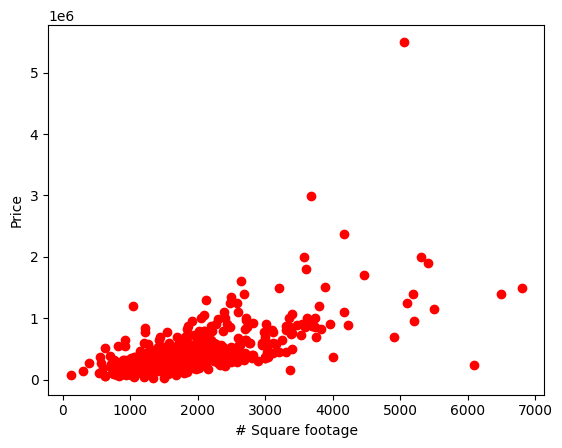

In [ ]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [ ]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1))
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)
y = y.reshape(len(X),1)

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

# For non-vectorized
X_train = X[:,1]
y_train = y

(781, 2)
(781, 1)


## Complete this code

In [ ]:
# Initialize vector w
w = np.random.rand(2,1)

# Learning rate
nu = 0.5

# Number of epochs
MAX_EPOCHS = 2000

mse_array = []

# Loop for 20000 epochs
for itr in range (0, MAX_EPOCHS):
    # Form W matrix -- this is to avoid having another for loop but if you don't to use it, that ok
    W = (np.matlib.repmat(w.transpose(),len(X),1))   # 781x2

    # TO DO: write update equation
    fx = np.sum(np.multiply(W, X), axis=1, keepdims=True)    # element-wise multiplication  576x2\
    d1 = fx - y
    w = w - nu*np.transpose(\
            np.mean(np.multiply(d1,X), axis=0, keepdims=True)) # average across columns

    # TO DO: compute MSE
    yhat = np.dot(X,w)
    mse = (np.sum((yhat-y)**2) / (2*len(y)))

    # Store MSE results for the plot
    mse_array.append(mse)

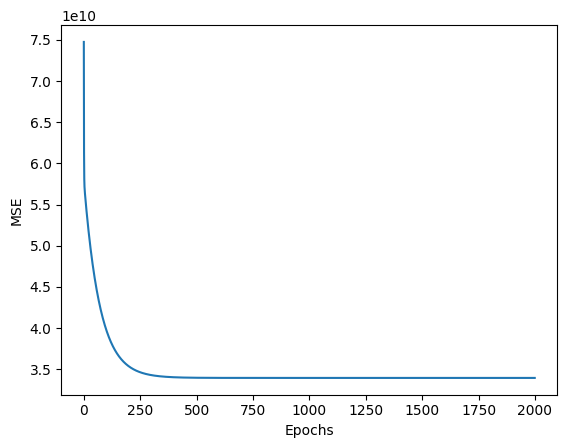

33955048432.56064


In [ ]:
### Plot MSE vs iterations
plt.plot(mse_array)  #
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()
print(mse )

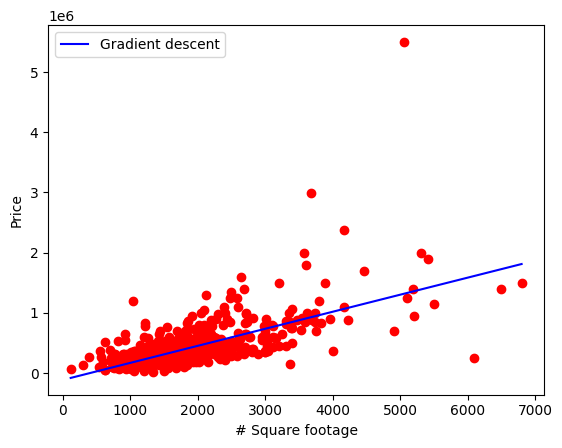

In [ ]:
### Plot the fitted curve

yhat = np.dot(np.sort(X, axis=0),w)

plt.plot(X[:,1] * max_min + Xmin, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [ ]:
print (w)

[[ -79538.70643895]
 [1891037.10264413]]


In [ ]:
### Predict the price of a 5000 sqft house
### Remember to normalize it first
sqft = 5000
norm_sqft = (sqft - Xmin)/max_min
print(w[0] + norm_sqft*w[1])

[1301937.50028311]
